In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

import oot_graph_builder as ogb

canvas_size = 20
font_color = 'gray'
font_size = 20
font_weight = 'bold'

all_actors_df = pd.read_csv("resources/VerboseOcarina/actors.csv", sep=';')
actors_no_cs = all_actors_df.loc[(all_actors_df['is_cutscene'] == False) &
                                 (all_actors_df['scene'] != 68) &
                                 (all_actors_df['scene'] != 71)]
all_spawns_df = pd.read_csv("resources/VerboseOcarina/spawns.csv", sep=';')
spawns_no_cs = all_spawns_df.loc[(all_spawns_df['is_cutscene'] == False) &
                                 (all_spawns_df['scene'] != 68) &
                                 (all_spawns_df['scene'] != 71)]
all_transition_actors_df = pd.read_csv("resources/VerboseOcarina/transition_actors.csv", sep=';')
transit_no_cs = all_transition_actors_df.loc[(all_transition_actors_df['is_cutscene'] == False) &
                                             (all_transition_actors_df['scene'] != 68) &
                                             (all_transition_actors_df['scene'] != 71)]

# scenes = [38, 52, 39, 40, 85, 41, 45, 91, 0, 17]
# scenes = [85]
scenes = range(101)

# setups = range(11)
setups = range(4)
# setups = (0,)

cutscenes_included = (
    False,
    # True,
)

G_union, pos_dict_norm = ogb.build_scenes(spawns_no_cs,
                                          actors_no_cs,
                                          transit_no_cs,
                                          scenes,
                                          setups,
                                          cutscenes_included,
                                          ogb.BLUE_WARP_EDGE_LIST +
                                          ogb.SCENE_TRANSITION_LIST
                                          # ogb.SAMPLE_TRANSITION_LIST
                                          )

# To add warps, uncomment respective lines

# G_w_sw = ogb.add_save_warps(G_union)
# G_w_dw = ogb.add_death_warps(G_union)
# G_w_songw = ogb.add_song_warps(G_union)
# G_w_aw = ogb.add_death_warps(G_w_sw)
# G_w_aw = ogb.add_song_warps(G_w_aw)

G_res = G_union

pos_dict = ogb.get_pos_dict(G_res)

print(f"{G_union = !s}")
# print(f"{G_w_sw = !s}")
# print(f"{G_w_dw = !s}")
# print(f"{G_w_songw = !s}")
# print(f"{G_w_aw = !s}")
print(f"{nx.number_weakly_connected_components(G_union) = }")
# print(f"{nx.number_weakly_connected_components(G_w_sw) = }")
# print(f"{nx.number_weakly_connected_components(G_w_dw) = }")
# print(f"{nx.number_weakly_connected_components(G_w_songw) = }")
# print(f"{nx.number_weakly_connected_components(G_w_aw) = }")


G_union = MultiDiGraph with 6753 nodes and 231826 edges
nx.number_weakly_connected_components(G_union) = 124


# Draw graph by in-game coordinates

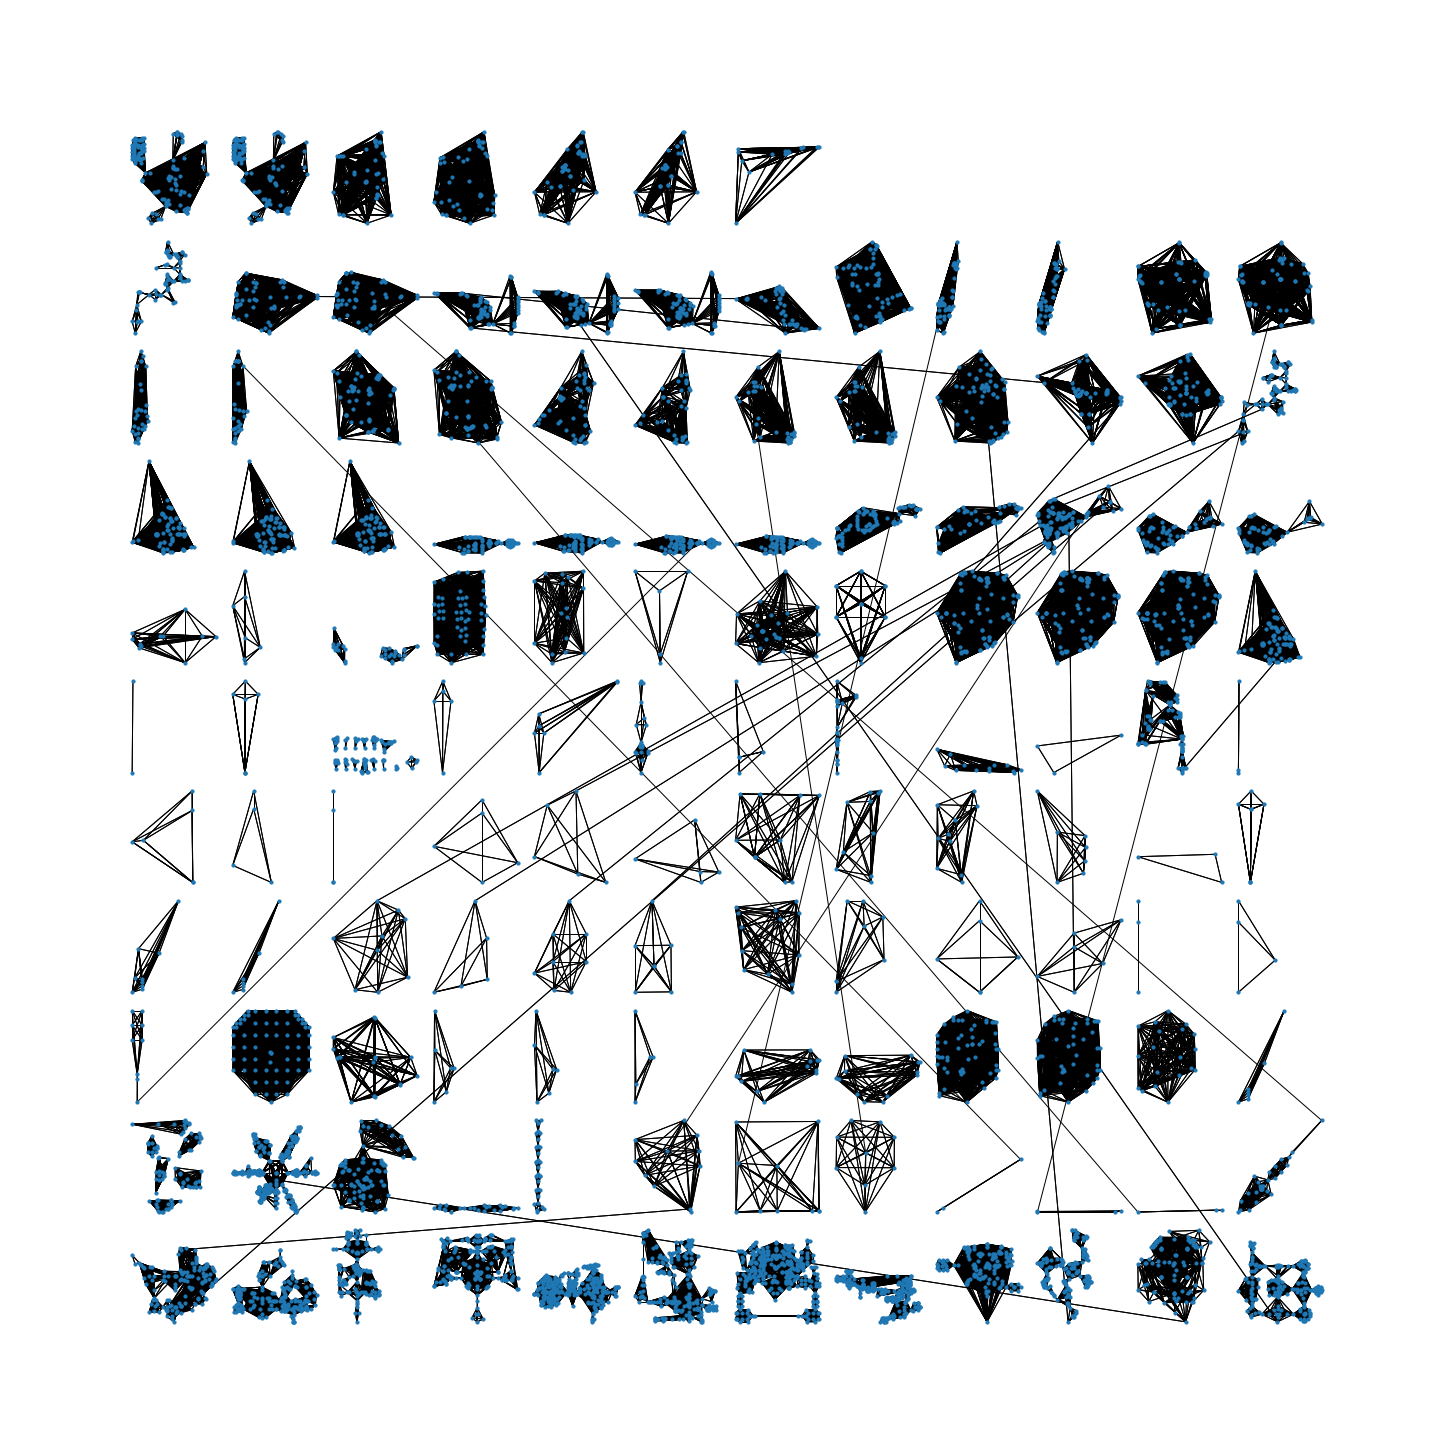

In [4]:
plt.figure(figsize=(canvas_size, canvas_size))
nx.draw(G_res,
        pos_dict_norm,
        arrows=False,
        with_labels=False,
        font_color=font_color,
        font_size=font_size,
        node_size=10
        )
# plt.savefig("output/graph_world.pdf")

# Draw graph by Kamada-Kawai algorithm

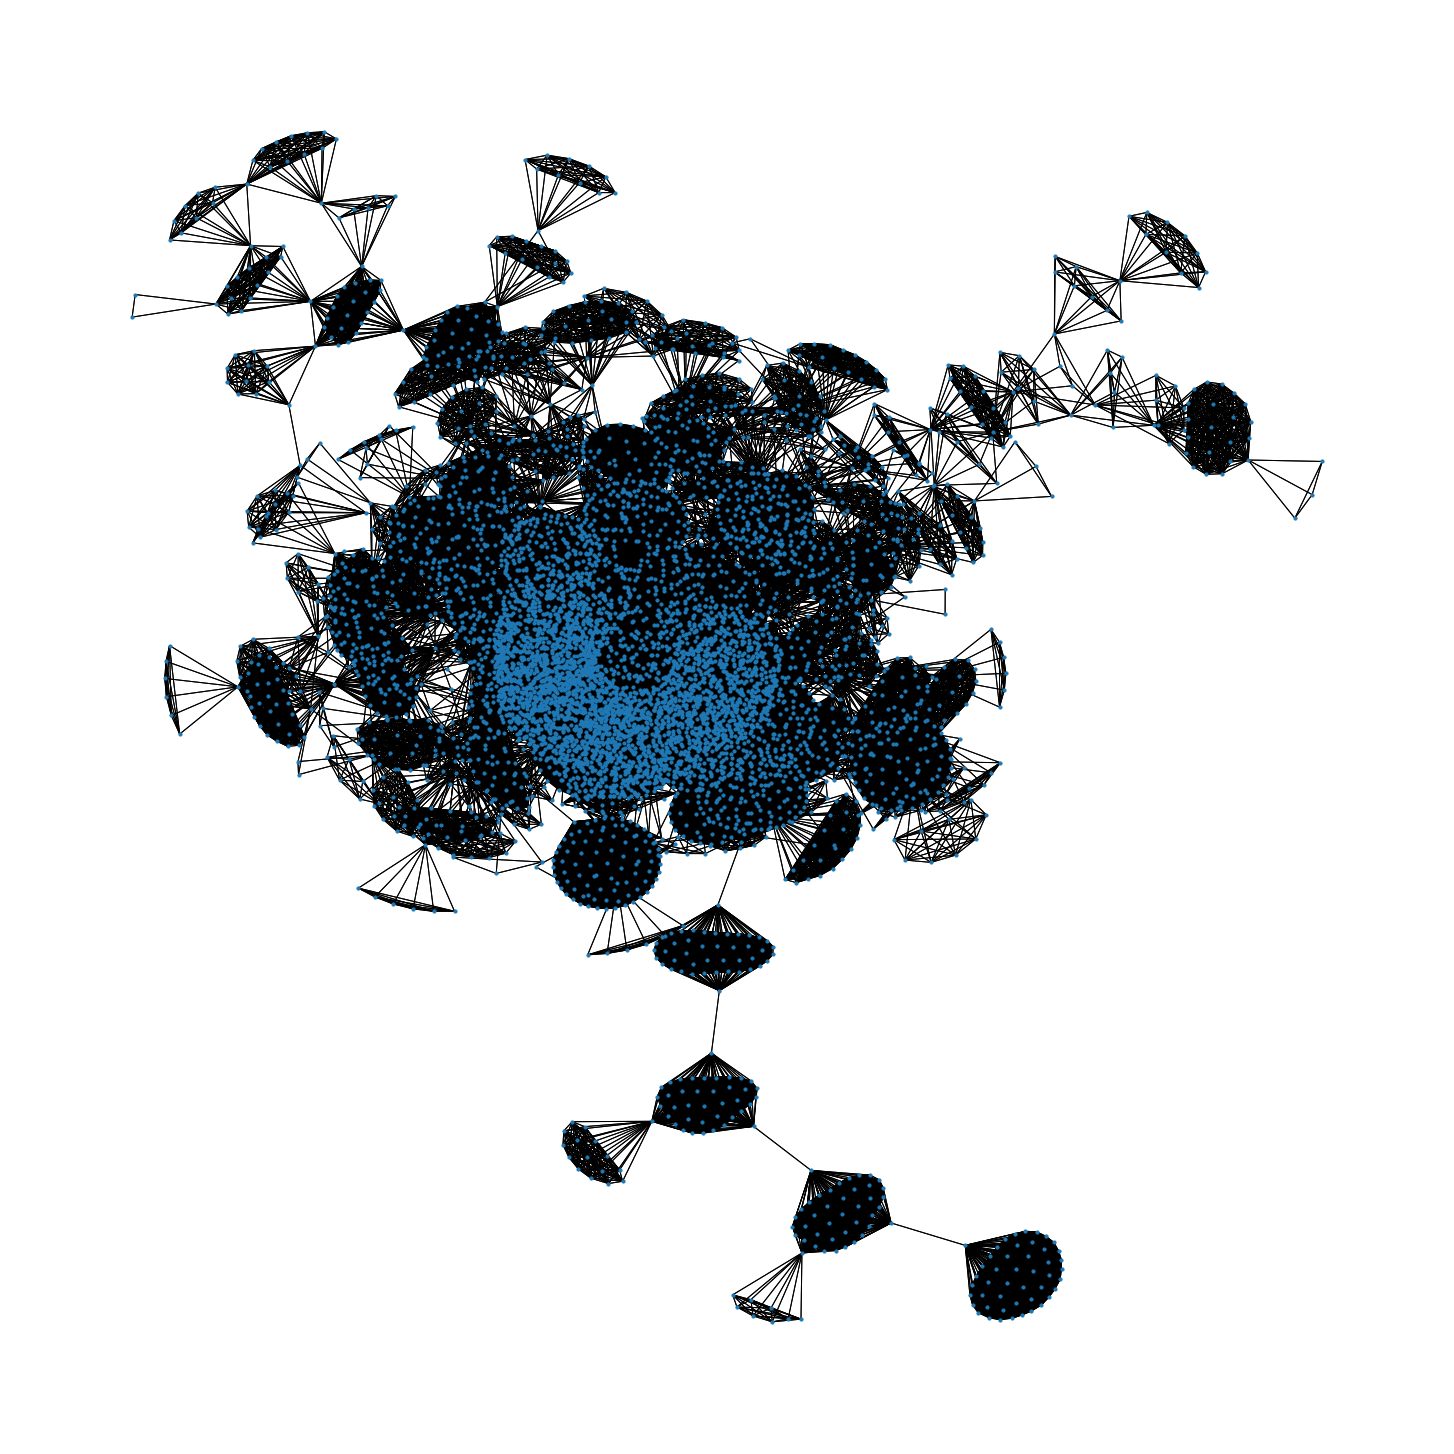

In [5]:
plt.figure(figsize=(canvas_size, canvas_size))
pos_dict = nx.kamada_kawai_layout(G_res)
nx.draw(G_res,
        pos_dict,
        arrows=False,
        with_labels=False,
        font_color=font_color,
        font_size=font_size,
        node_size=10
        )
# plt.savefig("output/graph_world_kawai.pdf")